In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
#loading data
all_data = pd.read_csv("data.csv")
train = all_data.iloc[:500000, :]
test = all_data.iloc[500000:, :]

In [3]:
train.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 500000 rows and 8 columns
----------------------------
The test data has 352122 rows and 8 columns


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
Price      500000 non-null int64
Year       500000 non-null int64
Mileage    500000 non-null int64
City       500000 non-null object
State      500000 non-null object
Vin        500000 non-null object
Make       500000 non-null object
Model      500000 non-null object
dtypes: int64(3), object(5)
memory usage: 30.5+ MB


In [6]:
#check missing values
train.columns[train.isnull().any()]

Index([], dtype='object')

In [7]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

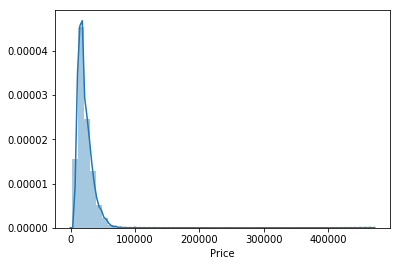

In [8]:
#SalePrice
sns.distplot(train['Price'])

In [11]:
#skewness
print("The skewness of SalePrice is {}".format(train['Price'].skew()))

The skewness of SalePrice is 5.030944808887083


Skewness is -0.313411576786557


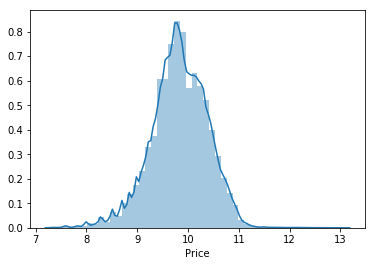

In [10]:
#now transforming the target variable
target = np.log(train['Price'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [11]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 3 numeric and 5 categorical columns in train data


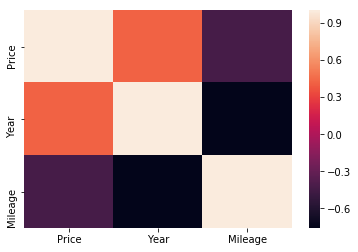

In [12]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [13]:
print (corr['Price'].sort_values(ascending=False), '\n')

Price      1.000000
Year       0.418964
Mileage   -0.429184
Name: Price, dtype: float64 



In [14]:
train['Year'].unique()

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997])

In [15]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='Year', values='Price', aggfunc=np.median).sort_values(by='Price')
pivot

,Price
Year,
1998,4500.0
1997,4622.5
2000,4995.0
1999,5000.0
2001,5495.0
2002,5990.0
2003,6069.0
2004,7446.0
2005,7995.0


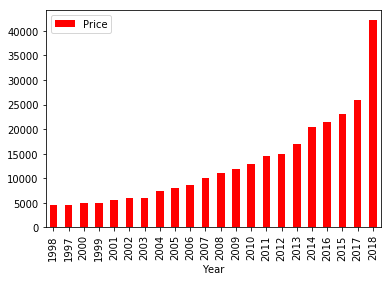

In [16]:
pivot.plot(kind='bar', color='red')

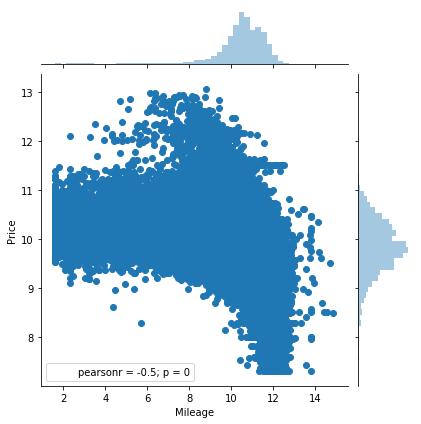

In [17]:
#GrLivArea variable
sns.jointplot(x=np.log(train['Mileage']), y=np.log(train['Price']))

In [18]:
cat_data.describe()

,City,State,Vin,Make,Model
count,500000,500000,500000,500000,500000
unique,2541,59,499953,27,1390
top,Houston,TX,3FA6P0LU4HR258592,Ford,Silverado
freq,6966,54878,2,110432,24932


In [19]:
sp_pivot = train.pivot_table(index='Make', values='Price', aggfunc=np.median).sort_values(by='Price')
sp_pivot

,Price
Make,
Isuzu,3995
Geo,5497
FIAT,11225
Hyundai,13695
Chrysler,14990
Honda,16000
HUMMER,16850
Jeep,16949
Dodge,17497


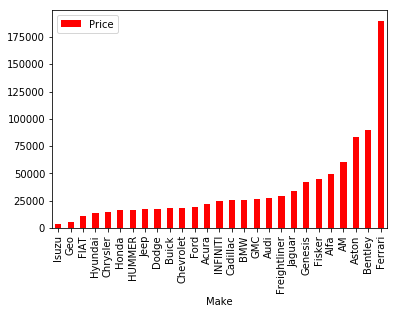

In [20]:
sp_pivot.plot(kind='bar',color='red')

In [15]:
sp_pivot_model = train.pivot_table(index='Model', values='Price', aggfunc=np.median).sort_values(by='Price')
sp_pivot_model

,Price
Model,
HombreReg,-4.526097
DeVille,-4.015343
Neonsx,-4.012633
Lumina4dr,-3.809469
G20Luxury,-3.713842
Prizm4dr,-3.666361
EscortFleet,-3.650050
Cirrus4dr,-3.644997
Regal97.5,-3.609909


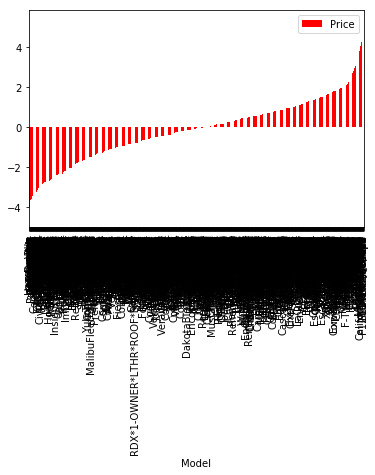

In [16]:
sp_pivot_model.plot(kind='bar',color='red')

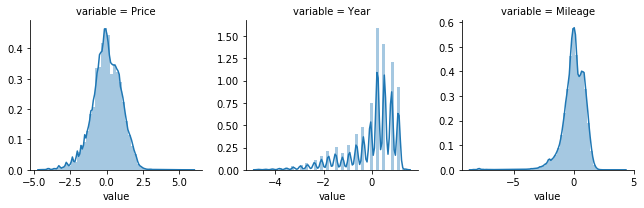

In [17]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [18]:
#create a label set
label_df = pd.DataFrame(index = train.index, columns = ['Price'])
label_df['Price'] = np.log(train['Price'])
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (500000, 8)
Test set size: (352122, 8)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
pd.options.mode.chained_assignment = None  # default='warn'
#get numeric features
numeric_features = [f for f in train.columns if train[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train[skewed] = np.log1p(train[skewed])
test[skewed] = np.log1p(test[skewed])

In [20]:
print(numeric_features)

['Price', 'Year', 'Mileage']


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[numeric_features])
scaled = scaler.transform(train[numeric_features])

for i, col in enumerate(numeric_features):
       train[col] = scaled[:,i]

scaled = scaler.fit_transform(test[numeric_features])

for i, col in enumerate(numeric_features):
      test[col] = scaled[:,i]

In [22]:
train.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,-1.300170,0.224876,-0.065362,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,-0.956124,-0.064325,-0.646172,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,-1.300170,-0.064325,0.237551,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,-0.937852,0.224876,0.042161,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,-0.403278,0.803278,-0.528426,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [23]:
# Removing Vin
del train["Vin"]
del test["Vin"]
# removing City
del train["City"]
del test["City"]
# removing Model
del train["Model"]
del test["Model"]

In [25]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       #onehot_df = onehot(onehot_df, df, "City", None)
       onehot_df = onehot(onehot_df, df, "State", None)
       onehot_df = onehot(onehot_df, df, "Make", None)
       #onehot_df = onehot(onehot_df, df, "Model", None)
       return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

In [26]:
onehot_df.head()

,_State_ AK,_State_ AL,_State_ AR,_State_ AZ,_State_ Az,_State_ CA,_State_ CO,_State_ CT,_State_ Ca,_State_ DC,...,_Make_GMC,_Make_Genesis,_Make_Geo,_Make_HUMMER,_Make_Honda,_Make_Hyundai,_Make_INFINITI,_Make_Isuzu,_Make_Jaguar,_Make_Jeep
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
train = train.join(onehot_df) 
train.shape

(500000, 91)

In [28]:
#adding one hot features to test
onehot_df_te = munge_onehot(test)
test = test.join(onehot_df_te)
test.shape

(352122, 96)

In [29]:
#create a label set
label_df = pd.DataFrame(index = train.index, columns = ['Price'])
label_df['Price'] = np.log(train['Price'])
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (500000, 91)
Test set size: (352122, 96)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
del train["Make"]
del test["Make"]

KeyError: 'Make'

In [34]:
del train["State"]
del test["State"]

In [46]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [50]:
train_cols = [f for f in train.columns if train[f].dtype != object]
test_cols = [f for f in test.columns if test[f].dtype != object]
valid_cols = intersection(train_cols, test_cols)
train = train[valid_cols]
test = test[valid_cols]

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(10)

#create Model
#define base model
def base_model():
     model = Sequential()
     model.add(Dense(20, input_dim=63, init='normal', activation='relu'))
     model.add(Dense(10, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(train)
X_test = scale.fit_transform(test)

keras_label = label_df.as_matrix()
clf = KerasRegressor(build_fn=base_model, nb_epoch=1000, batch_size=5,verbose=0)
clf.fit(X_train,keras_label)

#make predictions and create the submission file 
kpred = clf.predict(X_test) 
kpred = np.exp(kpred)
#pred_df = pd.DataFrame(kpred, index=test["Vin"], columns=["Price"]) 
#pred_df.to_csv('keras1.csv', header=True, index_label='Vin') 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=63, activation="relu", kernel_initializer="normal")`
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  


KeyError: 'Vin'

In [54]:
print(kpred)

[nan nan nan ... nan nan nan]
